In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# Define Dataset Paths (Data Collection)
data_train_path = 'Vegetable/train'
data_val_path = 'Vegetable/validate'
data_test_path = 'Vegetable/test'

In [3]:
# Set Image Fixed Size (Data Preprocessing)
img_width = 180
img_height = 180 

In [4]:
# Load Dataset (Data Collection + Preprocessing)
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 162 files belonging to 5 classes.


In [5]:
# Extract Class Name ( Label Mapping)
# Purpose: Automatically detects folder names as class labels 
data_cat = data_train.class_names

In [6]:
data_cat

['cabbage', 'carrot', 'cauliflower', 'eggplant', 'ginger']

In [7]:
# Load Dataset (Data Collection + Preprocessing)
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
    image_size=(img_height,img_width),
    batch_size=32,
     shuffle=False,
    validation_split=False)

Found 75 files belonging to 5 classes.


In [8]:
# Load Dataset (Data Collection + Preprocessing)
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 75 files belonging to 5 classes.


<Figure size 1000x1000 with 0 Axes>

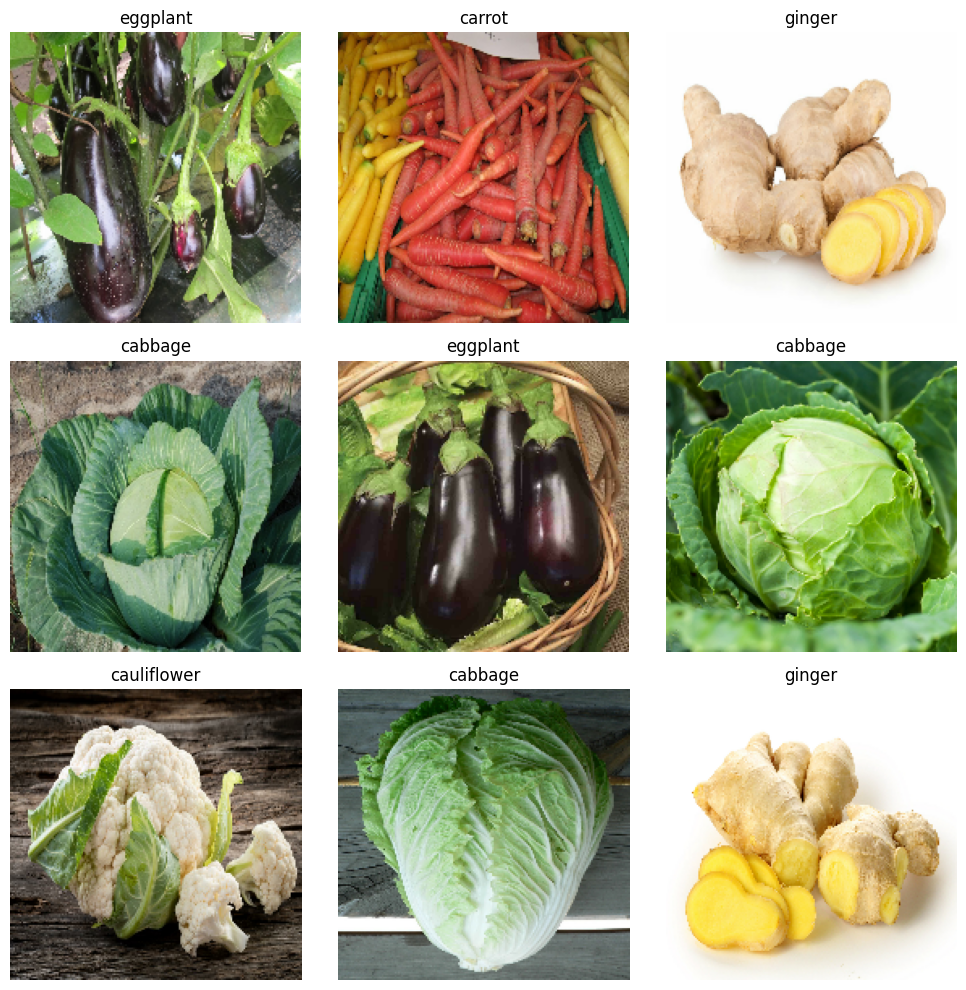

In [9]:
# Print images from the training dataset  

image, labels = next(iter(data_train))

plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))
for i in range(min(9, len(image))):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        label_index = labels[i].numpy()
        plt.title(data_cat[label_index])
        plt.axis("off")
        
plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
# Print data scope
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
# Model Building
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.1865 - loss: 9.5605 - val_accuracy: 0.3467 - val_loss: 2.1512
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.4073 - loss: 2.0020 - val_accuracy: 0.2133 - val_loss: 1.5820
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.4646 - loss: 1.2066 - val_accuracy: 0.4267 - val_loss: 1.2635
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.6378 - loss: 0.9290 - val_accuracy: 0.5467 - val_loss: 1.0346
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.7158 - loss: 0.7627 - val_accuracy: 0.6267 - val_loss: 0.9206
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.8166 - loss: 0.6058 - val_accuracy: 0.7067 - val_loss: 0.7591
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.8815 - loss: 0.3856 - val_accuracy: 0.5600 - val_loss: 0.9146
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.8161 - loss: 0.4425 - val_accuracy: 0.5467 - v

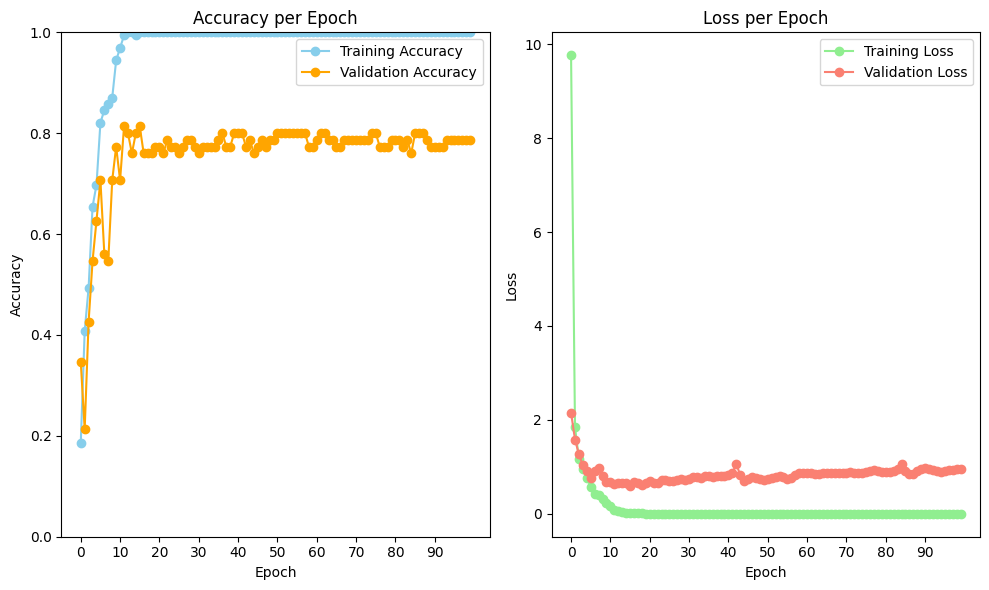

In [21]:
epochs_range = range(epochs_size)
x = np.arange(len(epochs_range))  # x-axis positions

plt.figure(figsize=(10, 6))

# 📊 Accuracy Line Chart
plt.subplot(1, 2, 1)
plt.plot(x, history.history['accuracy'], label='Training Accuracy', color='skyblue', marker='o')
plt.plot(x, history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, len(x), 10))  # Ticks every 10 epochs
plt.ylim(0, 1)
plt.legend()

# 📉 Loss Line Chart
plt.subplot(1, 2, 2)
plt.plot(x, history.history['loss'], label='Training Loss', color='lightgreen', marker='o')
plt.plot(x, history.history['val_loss'], label='Validation Loss', color='salmon', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(0, len(x), 10))  # Ticks every 10 epochs
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Sample of example image to see whether model is predicting properly or not
image = 'Test Image\carrot.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
# Pass to model
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [18]:
# Find the score
score = tf.nn.softmax(predict)

In [19]:
print('Vegetable in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Vegetable in image is carrot with accuracy of 91.09


In [20]:
model.save("Vegetable_Classifier_Model.keras")